<a href="https://colab.research.google.com/github/kaushal27120/My_Projects/blob/main/Climate_Data_Analysis_and_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plotly.offline import iplot
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeRegressor
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut


In [75]:
df = pd.read_csv('/content/weatherHistory.csv')
df.shape

(96453, 12)

In [76]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [77]:
df=df.drop(['Formatted Date','Loud Cover','Daily Summary'],axis=1)

In [78]:
df.columns = ['summary', 'precip_type', 'temperature', 'apparent_temperature', 'humidity', 'wind_speed', 'wind_bearing', 'visibilty','pressure']

In [79]:
df=df.drop(['summary'],axis=1)

In [80]:
df.shape

(96453, 8)

In [81]:
df.head()

,precip_type,temperature,apparent_temperature,humidity,wind_speed,wind_bearing,visibilty,pressure
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [82]:
df.dtypes

precip_type              object
temperature             float64
apparent_temperature    float64
humidity                float64
wind_speed              float64
wind_bearing            float64
visibilty               float64
pressure                float64
dtype: object

In [83]:
df['precip_type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [84]:
sum(df['precip_type'].isnull())

517

In [85]:
df.shape

(96453, 8)

In [86]:
df.precip_type.unique()

array(['rain', 'snow', nan], dtype=object)

In [87]:
df_dict={'rain':1,'snow':2,}

In [88]:
df['precip_type']=df['precip_type'].map(df_dict)

In [89]:
df.head()

,precip_type,temperature,apparent_temperature,humidity,wind_speed,wind_bearing,visibilty,pressure
0,1.0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,1.0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,1.0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,1.0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,1.0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [90]:
df['precip_type'].unique()

array([ 1.,  2., nan])

In [91]:
df['precip_type'][df['precip_type'].isnull()]=0

In [92]:
df.precip_type.unique()

array([1., 2., 0.])

In [93]:
df.shape

(96453, 8)

In [94]:
df.head()

,precip_type,temperature,apparent_temperature,humidity,wind_speed,wind_bearing,visibilty,pressure
0,1.0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,1.0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,1.0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,1.0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,1.0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


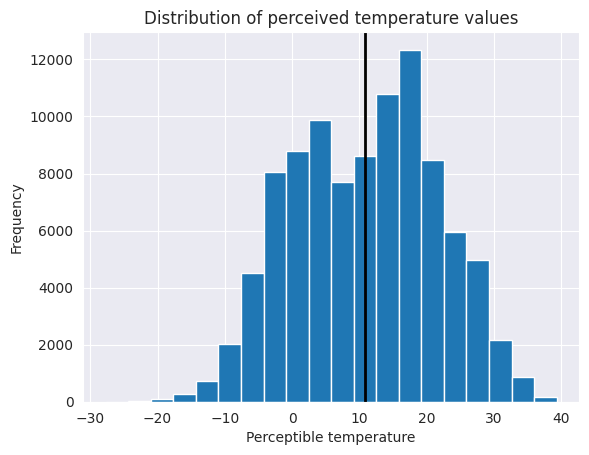

In [95]:
plt.hist(df.apparent_temperature, bins=20)
plt.title('Distribution of perceived temperature values')
plt.axvline(df.apparent_temperature.mean(), color='k', linestyle='-', linewidth=2)
plt.xlabel('Perceptible temperature')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='apparent_temperature'>

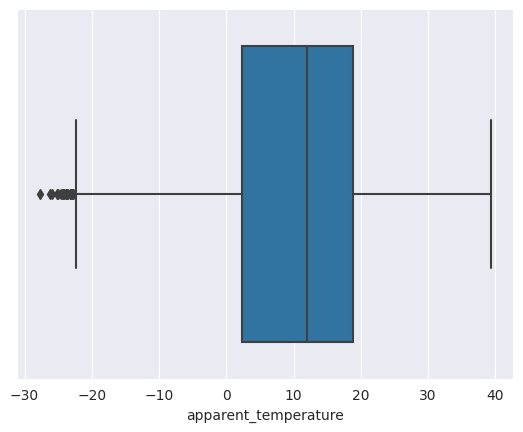

In [96]:
sns.set_style("darkgrid")
sns.boxplot(x = "apparent_temperature", data = df)

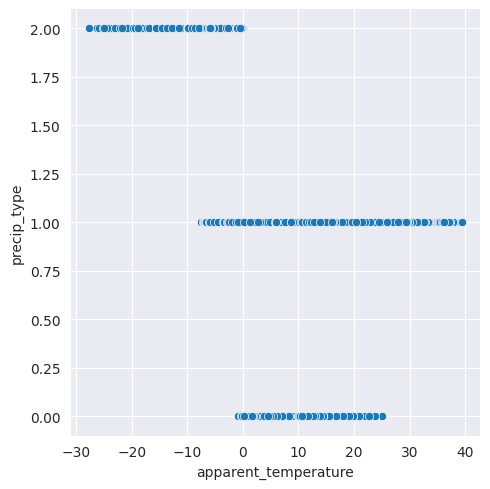

In [97]:
sns.relplot(y = "precip_type", x = "apparent_temperature", data = df)

In [98]:
layout = go.Layout(
    title="Perceived temperature depending on the type of precipitation",
    xaxis=dict(title="type of weather"),
    yaxis=dict(title="apparent_temperature"))

trace1=go.Box(y=df[(df.precip_type == 0)]["apparent_temperature"],
              name="clear weather")
trace2=go.Box(y=df[(df.precip_type == 1)]["apparent_temperature"],
              name="rain")
trace3=go.Box(y=df[(df.precip_type == 2)]["apparent_temperature"],
              name="snow")

data=[trace1, trace2, trace3]
iplot({"data": data, "layout": layout})

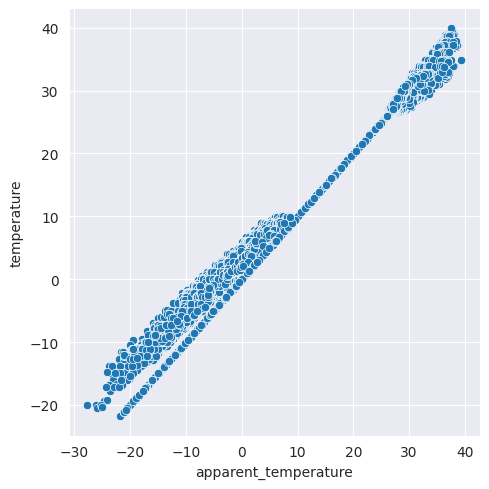

In [99]:
sns.relplot(y = "temperature", x = "apparent_temperature", data = df)

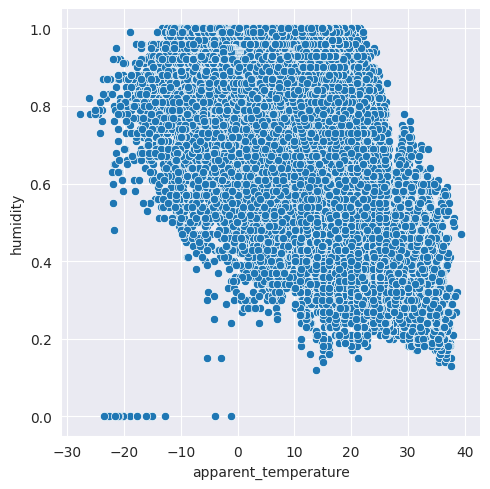

In [100]:
sns.relplot(y = "humidity", x = "apparent_temperature", data = df)

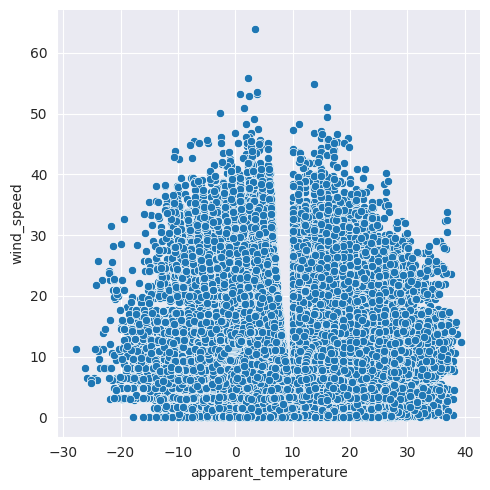

In [101]:
sns.relplot(y = "wind_speed", x = "apparent_temperature", data = df)

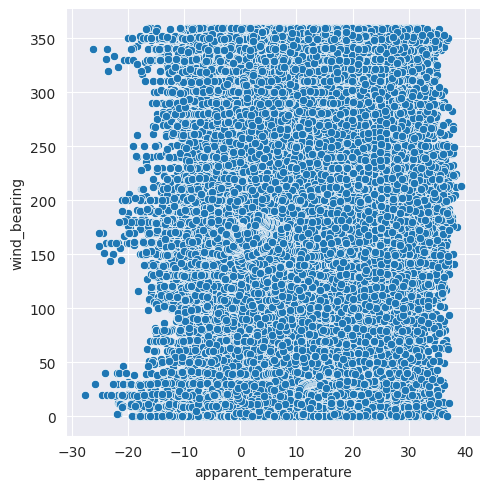

In [102]:
sns.relplot(y = "wind_bearing", x = "apparent_temperature", data = df)

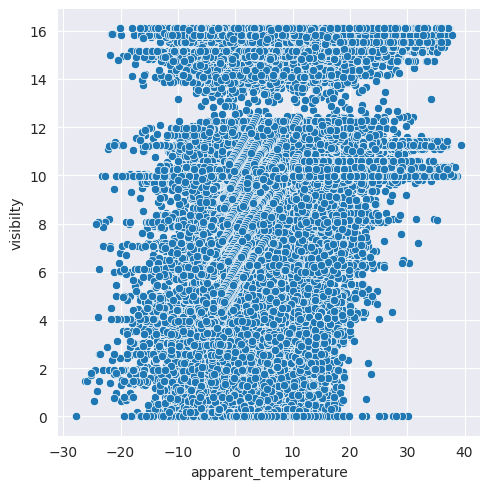

In [103]:
sns.relplot(y = "visibilty", x = "apparent_temperature", data = df)

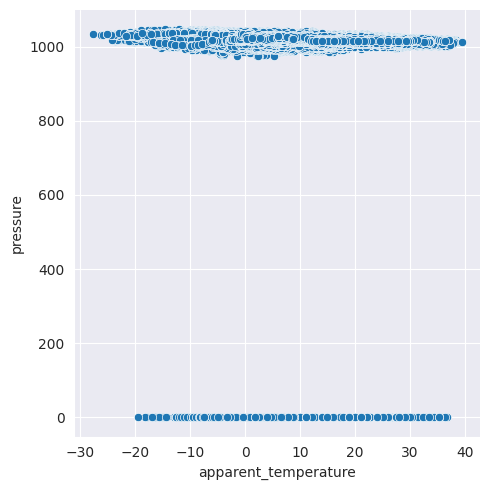

In [104]:
sns.relplot(y = "pressure", x = "apparent_temperature", data = df)

In [105]:
df = df.loc[df['humidity'] != 0.0]
df = df.loc[df['pressure'] != 0.0]

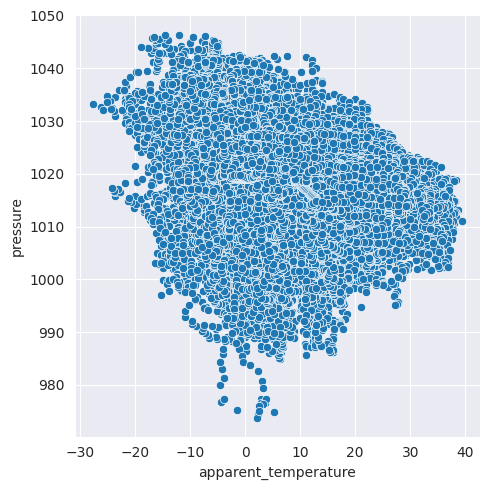

In [106]:
sns.relplot(y = "pressure", x = "apparent_temperature", data = df)

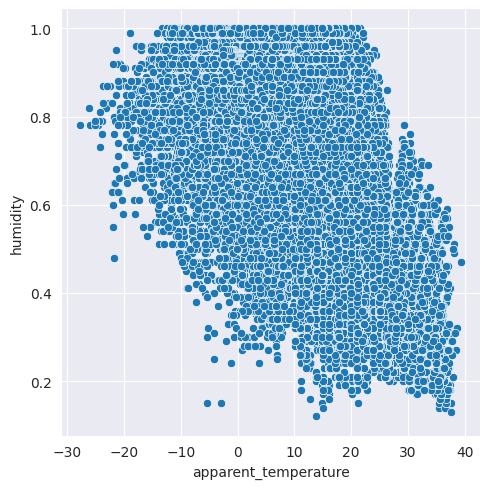

In [107]:
sns.relplot(y = "humidity", x = "apparent_temperature", data = df)

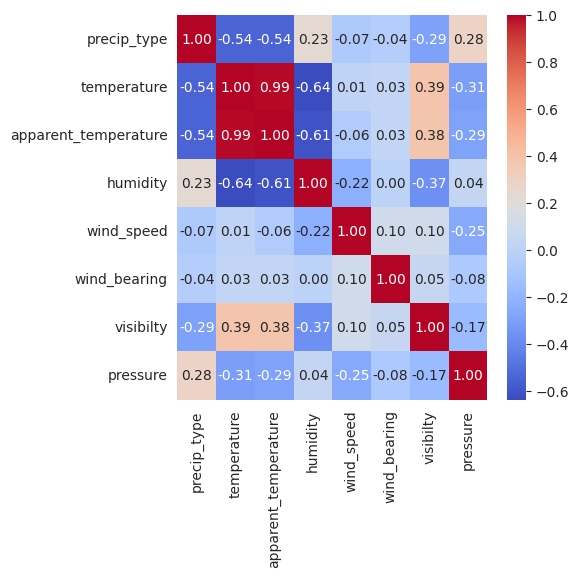

In [108]:
corr=df.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

plt.show()

In [109]:
df=df.drop(['temperature'],axis=1)

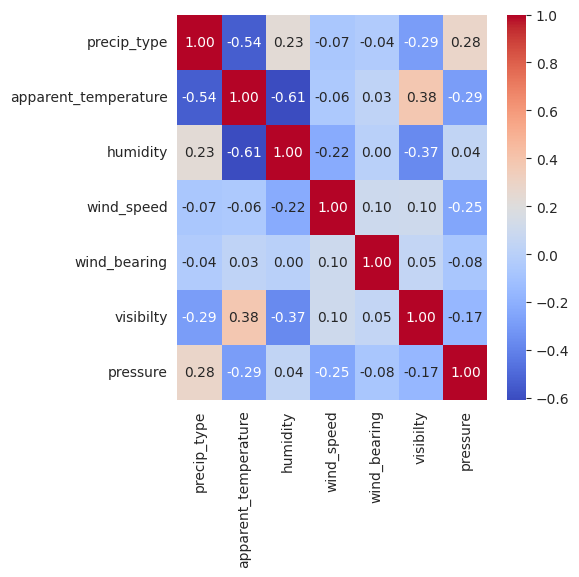

In [110]:
corr=df.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

plt.show()

In [111]:
df.head()

,precip_type,apparent_temperature,humidity,wind_speed,wind_bearing,visibilty,pressure
0,1.0,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,1.0,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,1.0,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,1.0,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,1.0,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [112]:
y = df[['apparent_temperature']]
X = df.drop('apparent_temperature', axis=1)

In [113]:
X.head()

,precip_type,humidity,wind_speed,wind_bearing,visibilty,pressure
0,1.0,0.89,14.1197,251.0,15.8263,1015.13
1,1.0,0.86,14.2646,259.0,15.8263,1015.63
2,1.0,0.89,3.9284,204.0,14.9569,1015.94
3,1.0,0.83,14.1036,269.0,15.8263,1016.41
4,1.0,0.83,11.0446,259.0,15.8263,1016.51


In [120]:
liner_model=LinearRegression()
liner_model.fit(X,y)

LinearRegression()

In [121]:
y_predict=liner_model.predict(X)
print('r2: ', r2_score(y,y_predict))
print('adj_r2: ',1-(1-r2_score(y,y_predict))*(len(y)-1)/(len(y)-X.shape[1]-1))
print('MAE: ',mean_absolute_error(y,y_predict))
print('MSE: ',mean_squared_error(y,y_predict,squared=False))

r2:  0.6323223764637627
adj_r2:  0.632299187915356
MAE:  5.269176041032788
MSE:  6.474930130102733


In [122]:
tree_model=DecisionTreeRegressor()
tree_model.fit(X,y)

DecisionTreeRegressor()

In [123]:
y_predict_tree=tree_model.predict(X)
print('tree r2: ', r2_score(y,y_predict_tree))
print('tree adj_r2: ',1-(1-r2_score(y,y_predict_tree))*(len(y)-1)/(len(y)-X.shape[1]-1))
print('tree MAE: ',mean_absolute_error(y,y_predict_tree))
print('tree MSE: ',mean_squared_error(y,y_predict_tree,squared=False))

tree r2:  0.9999882939152611
tree adj_r2:  0.9999882931769863
tree MAE:  0.0004638631673726219
tree MSE:  0.03653484912265304


In [124]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=42)

In [126]:
liner_model1=LinearRegression()
liner_model1.fit(X_train,y_train)

LinearRegression()

In [132]:
y_predict1=liner_model1.predict(X_test)
print('liner r2: ',r2_score(y_test,y_predict1))
print('liner MAE: ',mean_absolute_error(y_test,y_predict1))
print('liner MSE: ',mean_squared_error(y_test,y_predict1,squared=False))

liner r2:  0.6313354993936787
liner MAE:  5.267205129147754
liner MSE:  6.483355840405537


In [133]:
model=DecisionTreeRegressor()
para_tree = GridSearchCV(model, param_grid = {'max_depth':range(1, 11),
                                              'min_samples_split':range(50, 101, 10)},
                                              cv = 5,
                                              scoring= 'neg_mean_absolute_error')
para_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': range(50, 101, 10)},
             scoring='neg_mean_absolute_error')

In [134]:
print(para_tree.best_params_)


{'max_depth': 9, 'min_samples_split': 70}


In [137]:
tree_model = tree.DecisionTreeRegressor(min_samples_split = para_tree.best_params_['min_samples_split'],
                                        max_depth = para_tree.best_params_['max_depth'])
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_split=70)

In [138]:
print(-para_tree.best_score_)

4.6295946890683535


In [141]:
y_pred=para_tree.predict(X_test)
print('tree r2: ',r2_score(y_test,y_pred))
print('tree MAE: ',mean_absolute_error(y_test,y_pred))
print('tree MSE: ',mean_squared_error(y_test,y_pred,squared=False))


tree r2:  0.6927842758550674
tree MAE:  4.6054603251496395
tree MSE:  5.918421865475243
